In [3]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

**A simple Binary Tree class**

No contents (easy to add), just left and right successor


In [13]:
class BinTree :
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __str__(self):
        return " BinTree [left: %s, right: %s]" % (self.left, self.right)

Now, the following a little difficult to decypher, I know. Generally speaking, printing trees (and graphs!) is almost impossible, unless you burden the reader with getting some visual imagery from this nested lexical structure.

Also, designing a decent Tree API isn't trivial either, this constrtuctor-based approach is quite concise and good if you have the tree mentally set up, else it's terrible: You can't move branches around, add branches at run-time, remove branches, and and and...

So, since we're not really interested in this aspect of trere data structures (for now!), we'll leave it like that just to work with the fewest lines of code imaginable!

In [14]:
treeL = BinTree(BinTree(None,None),BinTree(BinTree(None,None),BinTree(None,None)))
treeR = BinTree(BinTree(None,None),BinTree(BinTree(None,None),None))
tree = BinTree(treeL,treeR)
print(tree)

 BinTree [left:  BinTree [left:  BinTree [left: None, right: None], right:  BinTree [left:  BinTree [left: None, right: None], right:  BinTree [left: None, right: None]]], right:  BinTree [left:  BinTree [left: None, right: None], right:  BinTree [left:  BinTree [left: None, right: None], right: None]]]


**The most elementary tree layout algorithm?**

Once you understand the ideas it's almost trivial:
1. We draw the tree from left to right, instead from top to bottom
2. The tree is drawn recursively, starting from the root and splitting the two successors at each step
3. The main idea is to give each recursion a "strip" in which to draw the tree including the root
    1. "x" is the horizontal position of the root
    2. "yLo" is the vertical lower bound in which the tree below the root can be drawn
    2. "yHi" is the vertical upper bound in which the tree below the root can be drawn
4. The constant $\Delta x$ is the horizontal offset between a node and its successors
    
Once you have that conceptualized, it's really easy to layout the tree:

1. The root is drawn at $(x,y)$ where $y$ is in the vertical center of the strip $yLo + (yHi - yLo)/2.$
2. The left successor is offset by $\Delta x$ and recursively drawn into the *lower* half of the strip
3. Same with the right successor $-$ it just goes into the *upper* half of the strip
4. Draw connecting edges if there actually is a successor on this side

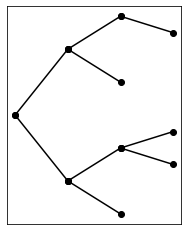

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

deltaX = 20 # Horizontal offset

def draw(tree) :
    figure, axes = plt.subplots() # PLot API "thingies"
    axes.set_aspect(1)
    
    layout(tree,5,0,100)          # Here's the call to the recursive layout function!
    
    # More PLot API "thingies"
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    plt.show()

def layout(root,x,yLo,yHi) :
    # Null root --> We landed below a leaf. Abort!
    if root is None : return None
    
    # Vertical center of the strip
    yPos = yLo + (yHi - yLo)*0.5 
    
    # Left goes into lower half (so when you turn it 90 degrees clockwise it's correct)
    yLeft = layout(root.left,x + deltaX, yLo, yPos)
    
    # Right goes into upper half
    yRight = layout(root.right,x + deltaX, yPos, yHi)
    
    # Plot edges if there's a left/right successor
    # "ko-" = black, circle, solid line
    if (yLeft is not None) : 
        plt.plot([x, x + deltaX], [yPos, yLeft], 'ko-')
    if (yRight is not None) : 
        plt.plot([x, x + deltaX], [yPos, yRight], 'ko-')
    
    return yPos
    
draw(tree)